In [1]:
import pymongo
client = pymongo.MongoClient()
table = client.clash.game_all

In [2]:
table.find({"platformId":"EUW1","queueId":700}).count()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


85733

Timestamp analysis

Getting matches from Mongo

In [3]:
timestamps = []
for g in table.find({},{"gameCreation":1,"queueId":1}):
    timestamps.append({"timestamp":g["gameCreation"],"queueId":g["queueId"]})

In [4]:
import pandas as pd

In [5]:
df_timestamps = pd.DataFrame(timestamps)

In [6]:
df_timestamps.count()

timestamp    4093541
queueId      4093541
dtype: int64

In [7]:
df_timestamps.head()

,timestamp,queueId
0,1569823866780,420
1,1569661088820,420
2,1569666601801,420
3,1569655645784,420
4,1569836933758,420


Separate first week (control) and second week (Clash week)

In [8]:
df_first_week = df_timestamps[((df_timestamps["timestamp"] >= 1569600000000) & (df_timestamps["timestamp"] <= 1569859200000))]

In [9]:
df_first_week.groupby("queueId").count()

,timestamp
queueId,
400,420540
420,537046
430,138346
440,122667
450,413090
460,171223
470,20081
800,3942
820,20011


In [10]:
df_second_week = df_timestamps[df_timestamps["timestamp"] >= 1569859200000]

In [11]:
df_second_week.groupby("queueId").count()

,timestamp
queueId,
400,417800
420,524184
430,135672
440,124991
450,367028
460,171944
470,19580
700,85733
800,3569


Plot number of game launching over time by periods of 10 minutes

In [12]:
#Normalize timestamps
df_first_week["timestamps"] = ((df_first_week["timestamp"] - 1569600000000) / 1000).astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
ax = df_first_week["timestamps"].hist(bins=6*62, figsize=(20,6), xrot=50, range=(0,60*60*62))
ax.set_xticks([3600*i*2 for i in range(0,32)], minor=False)
#ax.set_xticklabels(["Saturday 7pm","Saturday 9pm","Saturday 11pm","","","","","","","","","","Sunday 7pm","Sunday 9pm","Sunday 11pm"], ha="right")
ax.set_xticklabels(["Friday 6pm","Friday 8pm","Friday 10pm","Friday 12pm"
                    ,"","","","Saturday 8am","","","","","Saturday 6pm","Saturday 8pm","Saturday 10pm","Saturday 12pm"
                    ,"","","","Sunday 8am","","","","","Sunday 6pm","Sunday 8pm","Sunday 10pm","Sunday 12pm"
                   ,"","","","Monday 8am"], ha="right")
ax.set_ylabel("Games created (per 10 minutes)")
ax.set_xlabel("When")

Text(0.5, 0, 'When')

In [14]:
#Normalize timestamps
df_second_week["timestamps"] = ((df_second_week["timestamp"] - 1570204800000) / 1000).astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'When')

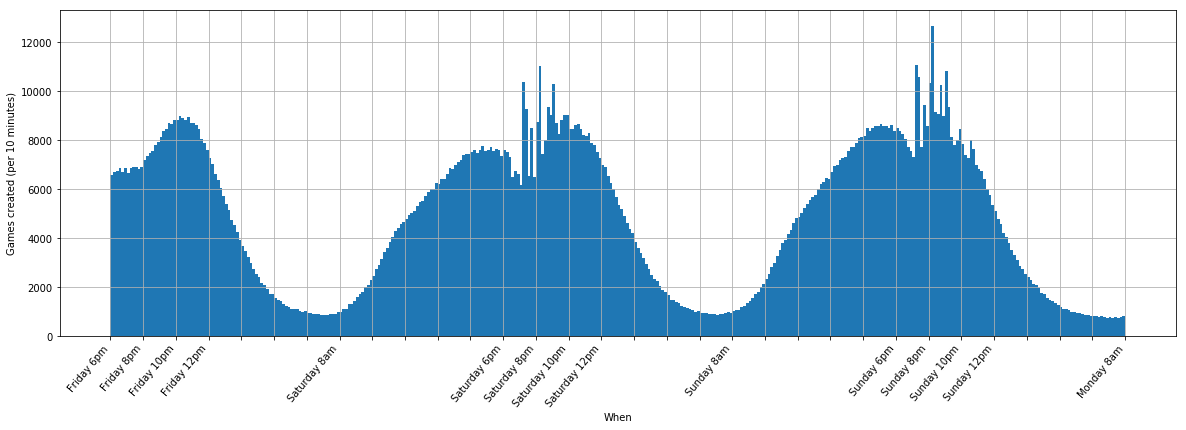

In [15]:
ax = df_second_week["timestamps"].hist(bins=6*62, figsize=(20,6), xrot=50, range=(0,60*60*62))
ax.set_xticks([3600*i*2 for i in range(0,32)], minor=False)
#ax.set_xticklabels(["Saturday 7pm","Saturday 9pm","Saturday 11pm","","","","","","","","","","Sunday 7pm","Sunday 9pm","Sunday 11pm"], ha="right")
ax.set_xticklabels(["Friday 6pm","Friday 8pm","Friday 10pm","Friday 12pm"
                    ,"","","","Saturday 8am","","","","","Saturday 6pm","Saturday 8pm","Saturday 10pm","Saturday 12pm"
                    ,"","","","Sunday 8am","","","","","Sunday 6pm","Sunday 8pm","Sunday 10pm","Sunday 12pm"
                   ,"","","","Monday 8am"], ha="right")
ax.set_ylabel("Games created (per 10 minutes)")
ax.set_xlabel("When")

Set Y-axis limit to have same scale in both plots

(0, 13000)

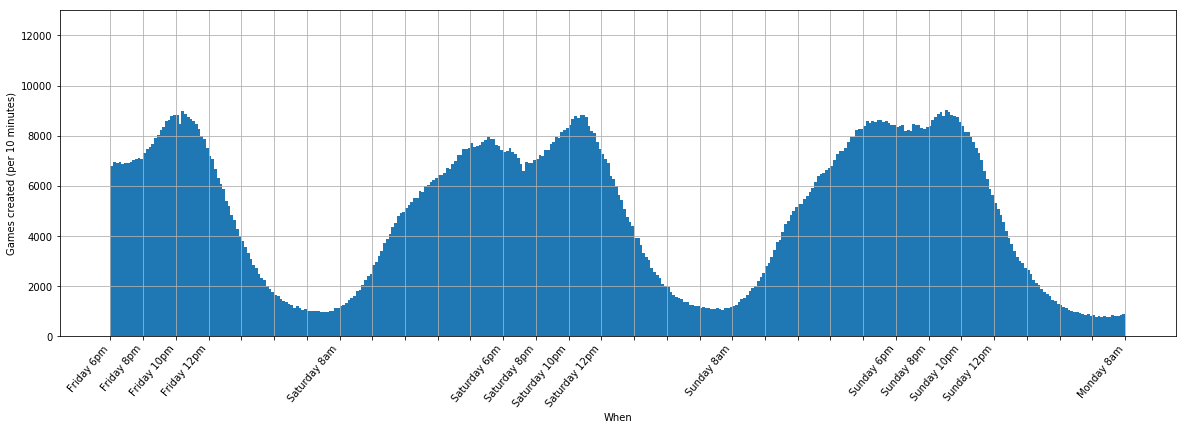

In [16]:
ax = df_first_week["timestamps"].hist(bins=6*62, figsize=(20,6), xrot=50, range=(0,60*60*62))
ax.set_xticks([3600*i*2 for i in range(0,32)], minor=False)
#ax.set_xticklabels(["Saturday 7pm","Saturday 9pm","Saturday 11pm","","","","","","","","","","Sunday 7pm","Sunday 9pm","Sunday 11pm"], ha="right")
ax.set_xticklabels(["Friday 6pm","Friday 8pm","Friday 10pm","Friday 12pm"
                    ,"","","","Saturday 8am","","","","","Saturday 6pm","Saturday 8pm","Saturday 10pm","Saturday 12pm"
                    ,"","","","Sunday 8am","","","","","Sunday 6pm","Sunday 8pm","Sunday 10pm","Sunday 12pm"
                   ,"","","","Monday 8am"], ha="right")
ax.set_ylabel("Games created (per 10 minutes)")
ax.set_xlabel("When")
ax.set_ylim([0,13000])

(0, 13000)

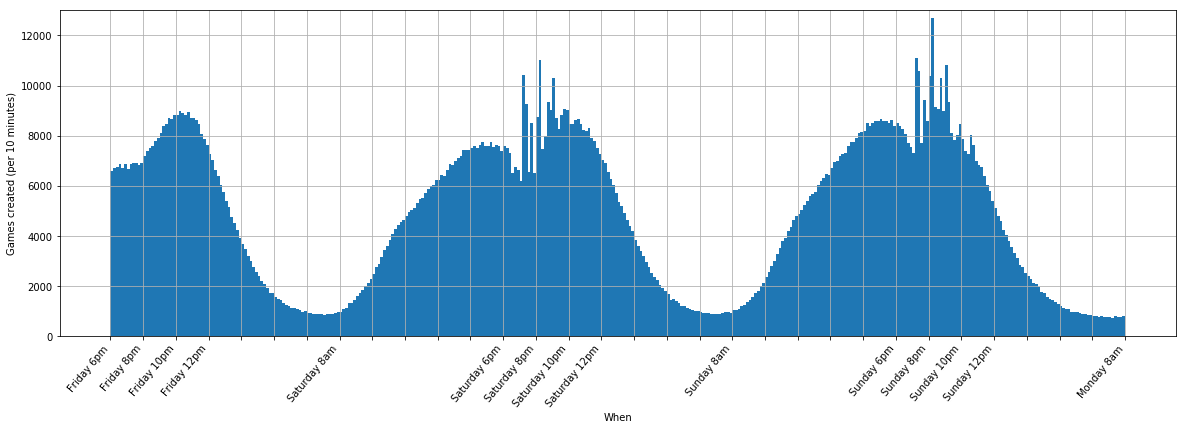

In [17]:
ax = df_second_week["timestamps"].hist(bins=6*62, figsize=(20,6), xrot=50, range=(0,60*60*62))
ax.set_xticks([3600*i*2 for i in range(0,32)], minor=False)
#ax.set_xticklabels(["Saturday 7pm","Saturday 9pm","Saturday 11pm","","","","","","","","","","Sunday 7pm","Sunday 9pm","Sunday 11pm"], ha="right")
ax.set_xticklabels(["Friday 6pm","Friday 8pm","Friday 10pm","Friday 12pm"
                    ,"","","","Saturday 8am","","","","","Saturday 6pm","Saturday 8pm","Saturday 10pm","Saturday 12pm"
                    ,"","","","Sunday 8am","","","","","Sunday 6pm","Sunday 8pm","Sunday 10pm","Sunday 12pm"
                   ,"","","","Monday 8am"], ha="right")
ax.set_ylabel("Games created (per 10 minutes)")
ax.set_xlabel("When")
ax.set_ylim([0,13000])

(0, 13000)

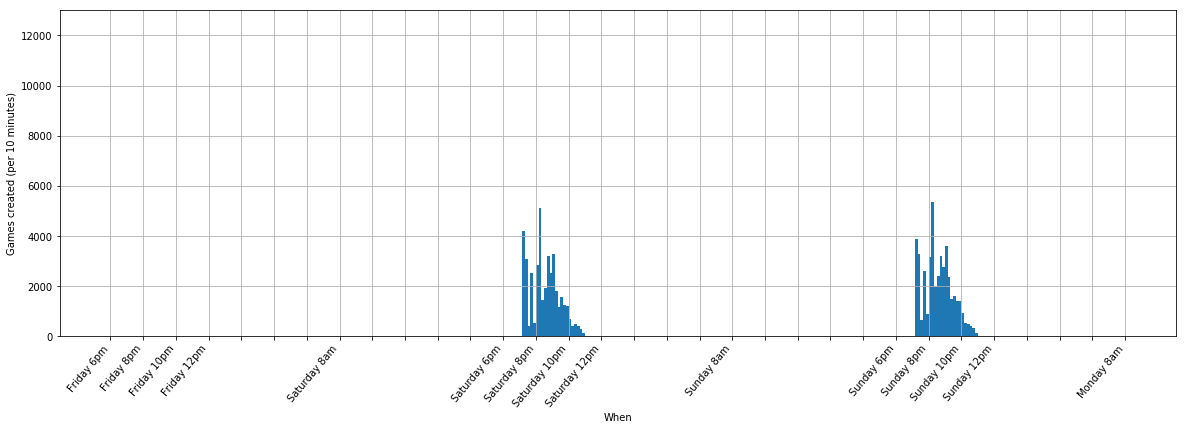

In [18]:
ax = df_second_week[df_second_week["queueId"]==700]["timestamps"].hist(bins=6*62, figsize=(20,6), xrot=50, range=(0,60*60*62))
ax.set_xticks([3600*i*2 for i in range(0,32)], minor=False)
#ax.set_xticklabels(["Saturday 7pm","Saturday 9pm","Saturday 11pm","","","","","","","","","","Sunday 7pm","Sunday 9pm","Sunday 11pm"], ha="right")
ax.set_xticklabels(["Friday 6pm","Friday 8pm","Friday 10pm","Friday 12pm"
                    ,"","","","Saturday 8am","","","","","Saturday 6pm","Saturday 8pm","Saturday 10pm","Saturday 12pm"
                    ,"","","","Sunday 8am","","","","","Sunday 6pm","Sunday 8pm","Sunday 10pm","Sunday 12pm"
                   ,"","","","Monday 8am"], ha="right")
ax.set_ylabel("Games created (per 10 minutes)")
ax.set_xlabel("When")
ax.set_ylim([0,13000])

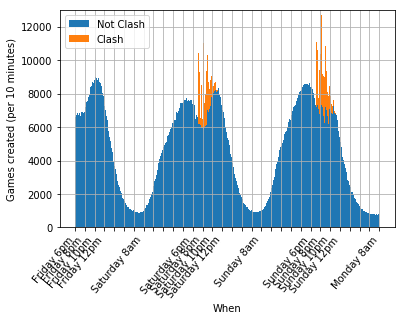

In [19]:
import matplotlib.pyplot as plt

ax = plt.subplot()
ax.hist(
    [
        df_second_week[df_second_week["queueId"] != 700]["timestamps"],
        df_second_week[df_second_week["queueId"] == 700]["timestamps"]
    ]
    , bins=6*62, stacked=True, range=(0,60*60*62))
ax.set_xticks([3600*i*2 for i in range(0,32)], minor=False)
ax.set_xticklabels(["Friday 6pm","Friday 8pm","Friday 10pm","Friday 12pm"
                    ,"","","","Saturday 8am","","","","","Saturday 6pm","Saturday 8pm","Saturday 10pm","Saturday 12pm"
                    ,"","","","Sunday 8am","","","","","Sunday 6pm","Sunday 8pm","Sunday 10pm","Sunday 12pm"
                   ,"","","","Monday 8am"], ha="right", rotation=50)
ax.set_ylabel("Games created (per 10 minutes)")
ax.set_xlabel("When")
ax.set_ylim([0,13000])

#plt.gcf().set_size_inches(20,6)
ax.legend(['Not Clash', 'Clash'])
ax.grid()

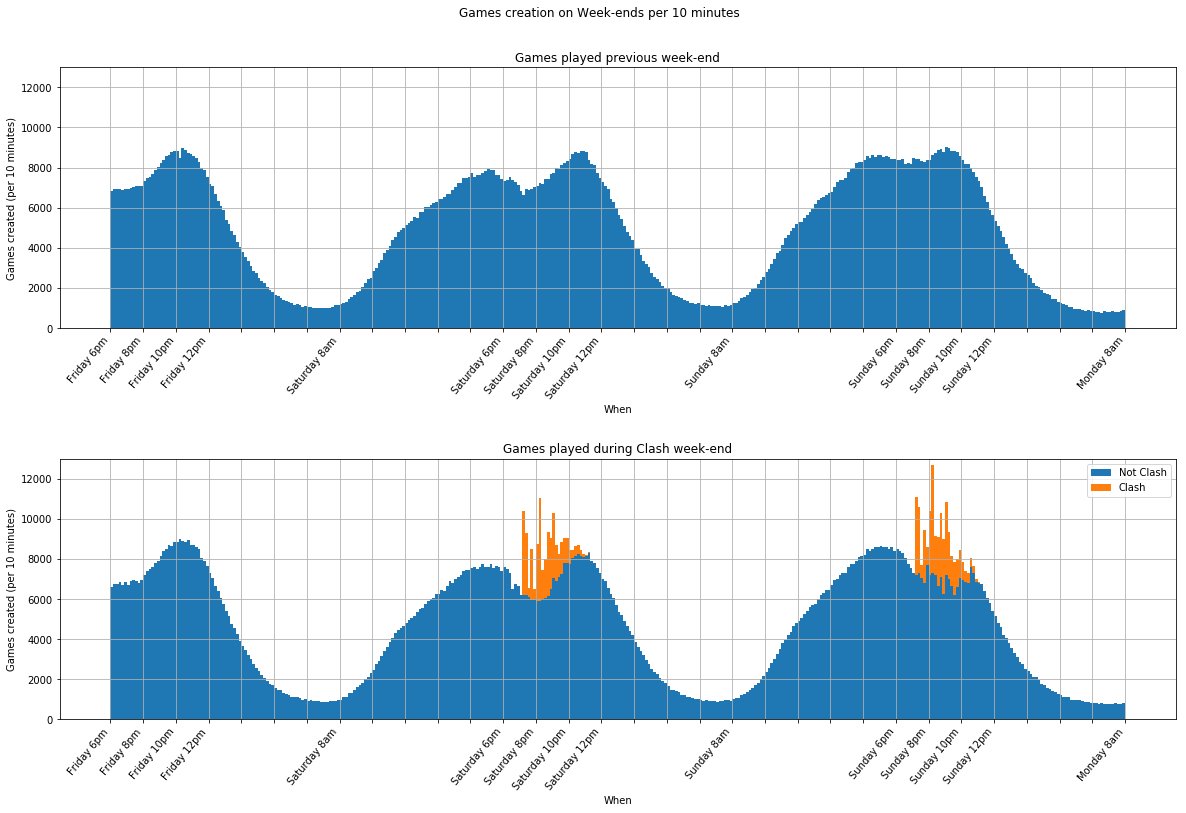

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)
df_first_week["timestamps"].hist(bins=6*62, figsize=(20,6), xrot=50, range=(0,60*60*62), ax=axes[0])
axes[0].set_xticks([3600*i*2 for i in range(0,32)], minor=False)
axes[0].set_xticklabels(["Friday 6pm","Friday 8pm","Friday 10pm","Friday 12pm"
                    ,"","","","Saturday 8am","","","","","Saturday 6pm","Saturday 8pm","Saturday 10pm","Saturday 12pm"
                    ,"","","","Sunday 8am","","","","","Sunday 6pm","Sunday 8pm","Sunday 10pm","Sunday 12pm"
                   ,"","","","Monday 8am"], ha="right")
axes[0].set_ylabel("Games created (per 10 minutes)")
axes[0].set_xlabel("When")
axes[0].set_ylim([0,13000])
axes[0].set_title("Games played previous week-end")

axes[1].hist(
    [
        df_second_week[df_second_week["queueId"] != 700]["timestamps"],
        df_second_week[df_second_week["queueId"] == 700]["timestamps"]
    ]
    , bins=6*62, stacked=True, range=(0,60*60*62))
axes[1].set_xticks([3600*i*2 for i in range(0,32)], minor=False)
axes[1].set_xticklabels(["Friday 6pm","Friday 8pm","Friday 10pm","Friday 12pm"
                    ,"","","","Saturday 8am","","","","","Saturday 6pm","Saturday 8pm","Saturday 10pm","Saturday 12pm"
                    ,"","","","Sunday 8am","","","","","Sunday 6pm","Sunday 8pm","Sunday 10pm","Sunday 12pm"
                   ,"","","","Monday 8am"], ha="right", rotation=50)
axes[1].set_ylabel("Games created (per 10 minutes)")
axes[1].set_xlabel("When")
axes[1].set_ylim([0,13000])

#plt.gcf().set_size_inches(20,6)
axes[1].legend(['Not Clash', 'Clash'])
axes[1].grid()
axes[1].set_title("Games played during Clash week-end")

fig.suptitle("Games creation on Week-ends per 10 minutes", y=0.95)
fig.set_size_inches(20, 12)
plt.subplots_adjust(hspace=0.5)
fig.show()

Number of games played by player

In [21]:
games_played = {}
for g in table.find({"platformId":"EUW1","queueId":700},{"participantIdentities":1}):
    for p in g["participantIdentities"]:
        if not p["player"]["currentAccountId"] in games_played:
            games_played[p["player"]["currentAccountId"]] = 0
        games_played[p["player"]["currentAccountId"]] += 1

In [22]:
df_played = pd.DataFrame([{"id":i,"nb_games":games_played[i]} for i in games_played])

In [23]:
sum_game_values = df_played.groupby("nb_games").count().values
sum_game_index = df_played.groupby("nb_games").count().index

In [24]:
sum_game_values_flat = [i[0] for i in sum_game_values]

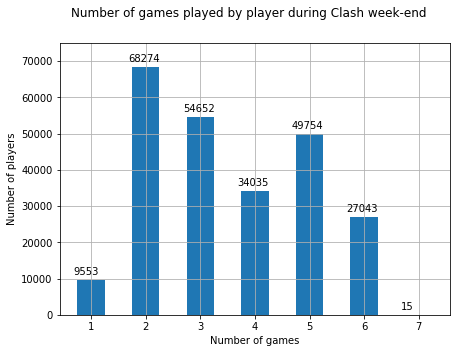

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5)) 
plt.bar(list(sum_game_index), sum_game_values_flat, width=0.5)
plt.ylim(0, 75000)
plt.grid()
plt.ylabel("Number of players")
plt.xlabel("Number of games")
plt.suptitle("Number of games played by player during Clash week-end")
xlocs, xlabs = plt.xticks()
for i, v in enumerate(sum_game_values_flat):
    plt.text(xlocs[i] + 0.68, v+1500, str(v))

Exporting dataframes

In [26]:
df_timestamps.to_csv("df_timestamps.csv", index=False)
df_played.to_csv("df_played.csv", index=False)

Checking number of players per day

In [27]:
players_by_day = {"saturday":set(),"sunday":set()}
for g in table.find({"platformId":"EUW1","queueId":700},{"participantIdentities":1,"gameCreation":1}):
    for p in g["participantIdentities"]:
        if g["gameCreation"] < 1570367865000:
            players_by_day["saturday"].add(p["player"]["summonerId"])
        else:
            players_by_day["sunday"].add(p["player"]["summonerId"])

In [28]:
print("Number of players on Saturday : ", len(players_by_day["saturday"]))
print("Number of players on Sunday : ", len(players_by_day["sunday"]))
print("Number of players playing only one day : ", len(players_by_day["saturday"].union(players_by_day["sunday"])) - len(players_by_day["saturday"].intersection(players_by_day["sunday"])))
print("Number of players playing both days : ", len(players_by_day["saturday"].intersection(players_by_day["sunday"])))

Number of players on Saturday :  171500
Number of players on Sunday :  187520
Number of players playing only one day :  127632
Number of players playing both days :  115694
